In [6]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_cors import CORS
import torch
from dotenv import load_dotenv
from src.model import ClimbNet
from src.generator import ClimbGenerator
from src.utils import OutputConversion
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import networkx as nx

# The given vector
vector = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]

# Convert the vector into an 18x11 grid
# Convert the vector into an 18x11 grid
grid = np.array(vector).reshape(18, 11)

# Labels for rows (y-axis) and columns (x-axis)
x_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
y_labels = [str(i) for i in range(1, 19)]

# List the selected cells
selected_cells = []
for idx, value in enumerate(vector):
    if value == 1.0:
        row = idx // 11
        col = idx % 11
        label = f'{x_labels[col]}{y_labels[row]}'
        selected_cells.append(label)
# Print the selected cells
for cell in selected_cells:
    print(cell)

K5
J8
H11
I14
G18


In [20]:
h_incpt = 93.3
h_scalar = 50
v_incpt = 63.5
v_scalar = 50
holds = []
for row in range(18):
    for col in range(11):
        hold_id = f"{chr(65 + col)}{row + 1}"
        x = h_incpt + h_scalar * col
        y = v_incpt + v_scalar * row
        holds.append({"id": hold_id, "x": x, "y": y})
print(holds)
pos = {hold['id']: (hold['x'], hold['y']) for hold in holds}

[{'id': 'A1', 'x': 93.3, 'y': 63.5}, {'id': 'B1', 'x': 143.3, 'y': 63.5}, {'id': 'C1', 'x': 193.3, 'y': 63.5}, {'id': 'D1', 'x': 243.3, 'y': 63.5}, {'id': 'E1', 'x': 293.3, 'y': 63.5}, {'id': 'F1', 'x': 343.3, 'y': 63.5}, {'id': 'G1', 'x': 393.3, 'y': 63.5}, {'id': 'H1', 'x': 443.3, 'y': 63.5}, {'id': 'I1', 'x': 493.3, 'y': 63.5}, {'id': 'J1', 'x': 543.3, 'y': 63.5}, {'id': 'K1', 'x': 593.3, 'y': 63.5}, {'id': 'A2', 'x': 93.3, 'y': 113.5}, {'id': 'B2', 'x': 143.3, 'y': 113.5}, {'id': 'C2', 'x': 193.3, 'y': 113.5}, {'id': 'D2', 'x': 243.3, 'y': 113.5}, {'id': 'E2', 'x': 293.3, 'y': 113.5}, {'id': 'F2', 'x': 343.3, 'y': 113.5}, {'id': 'G2', 'x': 393.3, 'y': 113.5}, {'id': 'H2', 'x': 443.3, 'y': 113.5}, {'id': 'I2', 'x': 493.3, 'y': 113.5}, {'id': 'J2', 'x': 543.3, 'y': 113.5}, {'id': 'K2', 'x': 593.3, 'y': 113.5}, {'id': 'A3', 'x': 93.3, 'y': 163.5}, {'id': 'B3', 'x': 143.3, 'y': 163.5}, {'id': 'C3', 'x': 193.3, 'y': 163.5}, {'id': 'D3', 'x': 243.3, 'y': 163.5}, {'id': 'E3', 'x': 293.3, 

In [8]:
level ='easy'

generator = ClimbGenerator(level)
clf = ClimbNet()
weights_filepath = "src/climbnet_weights.pth"
clf.load_state_dict(torch.load(weights_filepath))

clf.eval()
climb, labels, vector = generator.generate_climb()

In [23]:

def plot_generated_climb(climb, labels, img_path='static/generate.jpeg'):
    
    h_incpt = 93.3
    h_scalar = 50
    v_incpt = 63.5
    v_scalar = 50
    holds = []
    for row in range(18):
        for col in range(11):
            hold_id = f"{chr(65 + col)}{row + 1}"
            x = h_incpt + h_scalar * col
            y = v_incpt + v_scalar * row
            holds.append({"id": hold_id, "x": x, "y": y})
    G = nx.Graph()
    for hold in holds:
        G.add_node(hold['id'], pos=(hold['x'], hold['y']))
    
    wall_img = mpimg.imread(img_path)
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(wall_img, extent=[0, wall_img.shape[1], 0, wall_img.shape[0]])
    # Get positions of holds
    pos = {hold['id']: (hold['x'], hold['y']) for hold in holds}
    # Highlight the generated climb
    print(pos)
    for hold, label in zip(climb, labels):
        print(climb, labels)
        color = 'green' if label == 'starting hold' else ('blue' if label == 'intermediate hold' else 'red')
        nx.draw_networkx_nodes(G, pos, nodelist=[hold], ax=ax, node_size=600, node_color='none', edgecolors=color, linewidths=2.5)
        # nx.draw_networkx_nodes(G, pos, nodelist=[hold], ax=ax, node_size=600, node_color=color, edgecolors='none', linewidths=2.5, alpha=0.5)
    plt.show()


{'A1': (93.3, 63.5), 'B1': (143.3, 63.5), 'C1': (193.3, 63.5), 'D1': (243.3, 63.5), 'E1': (293.3, 63.5), 'F1': (343.3, 63.5), 'G1': (393.3, 63.5), 'H1': (443.3, 63.5), 'I1': (493.3, 63.5), 'J1': (543.3, 63.5), 'K1': (593.3, 63.5), 'A2': (93.3, 113.5), 'B2': (143.3, 113.5), 'C2': (193.3, 113.5), 'D2': (243.3, 113.5), 'E2': (293.3, 113.5), 'F2': (343.3, 113.5), 'G2': (393.3, 113.5), 'H2': (443.3, 113.5), 'I2': (493.3, 113.5), 'J2': (543.3, 113.5), 'K2': (593.3, 113.5), 'A3': (93.3, 163.5), 'B3': (143.3, 163.5), 'C3': (193.3, 163.5), 'D3': (243.3, 163.5), 'E3': (293.3, 163.5), 'F3': (343.3, 163.5), 'G3': (393.3, 163.5), 'H3': (443.3, 163.5), 'I3': (493.3, 163.5), 'J3': (543.3, 163.5), 'K3': (593.3, 163.5), 'A4': (93.3, 213.5), 'B4': (143.3, 213.5), 'C4': (193.3, 213.5), 'D4': (243.3, 213.5), 'E4': (293.3, 213.5), 'F4': (343.3, 213.5), 'G4': (393.3, 213.5), 'H4': (443.3, 213.5), 'I4': (493.3, 213.5), 'J4': (543.3, 213.5), 'K4': (593.3, 213.5), 'A5': (93.3, 263.5), 'B5': (143.3, 263.5), 'C5

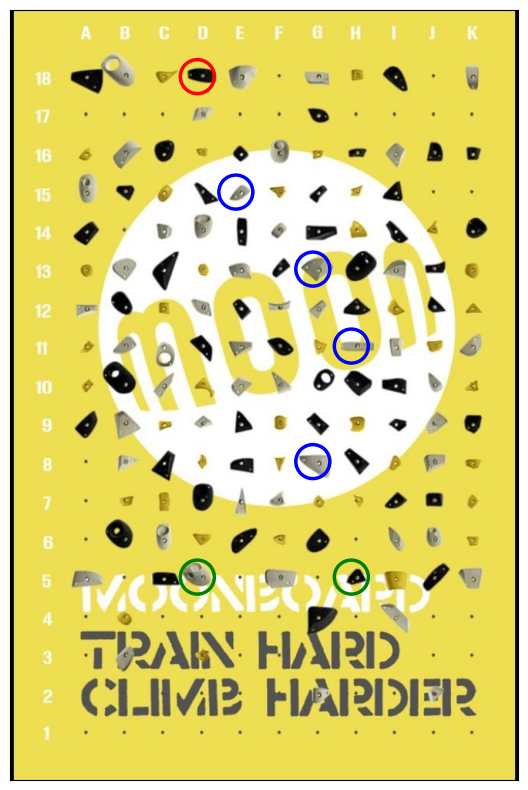

In [24]:
plot_generated_climb(climb,labels)